In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestClassifier
import seaborn as sb

In [45]:
df = pd.read_csv('./data/wineQT.csv')

In [46]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


### Det finns attributet id som inte behöver vara med när vi ska analysera datan

In [47]:
df = df.drop(columns='Id')

In [48]:
print(f"Datasetet har {df.shape[0]}st datapunkter")
print(f"Datasetet har {df.shape[1]}st attribut")

Datasetet har 1143st datapunkter
Datasetet har 12st attribut


In [49]:
kvalitet = df['quality'].unique()
print(f"Quality har ett värde mellan {kvalitet.min()} - {kvalitet.max()} som indikerar hur bra dom är")

Quality har ett värde mellan 3 - 8 som indikerar hur bra dom är


<Axes: >

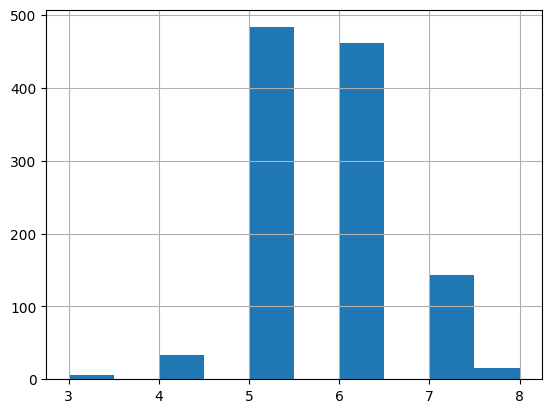

In [50]:
df['quality'].hist()

### Som vi ser på quality så är vinerna betygsatta mellan 3-8 men mest har fått betyget 5 och 6

fixed acidity


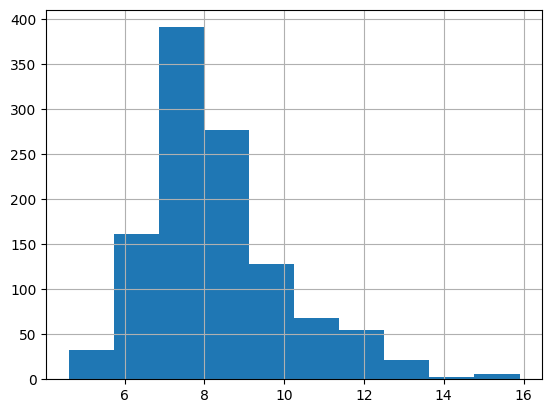

volatile acidity


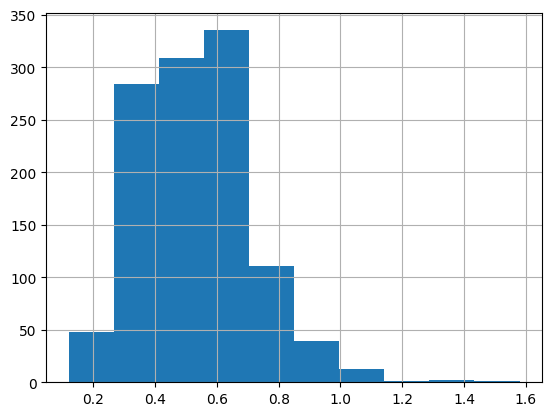

citric acid


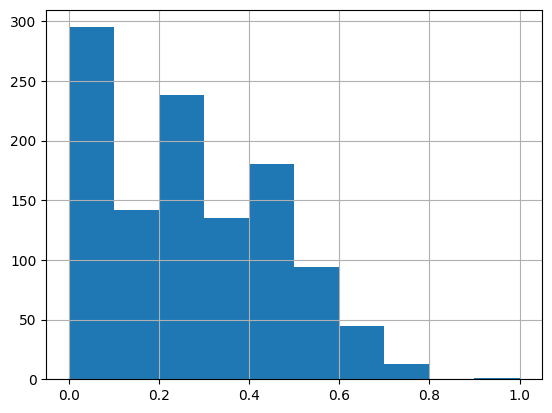

residual sugar


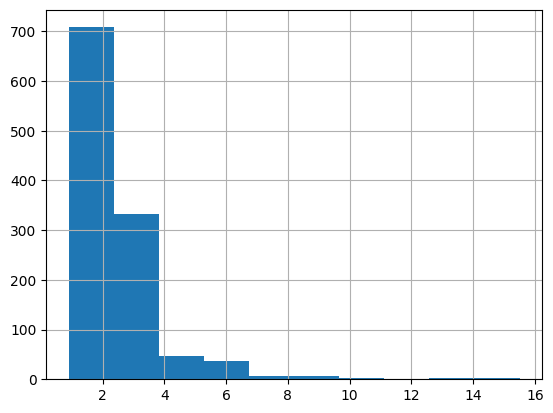

chlorides


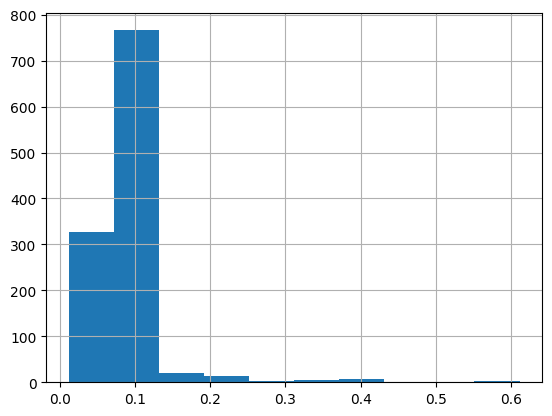

free sulfur dioxide


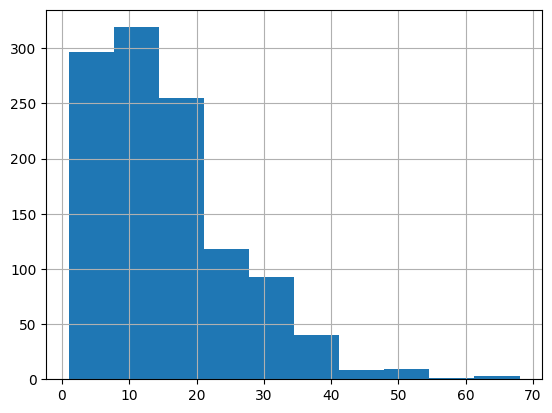

total sulfur dioxide


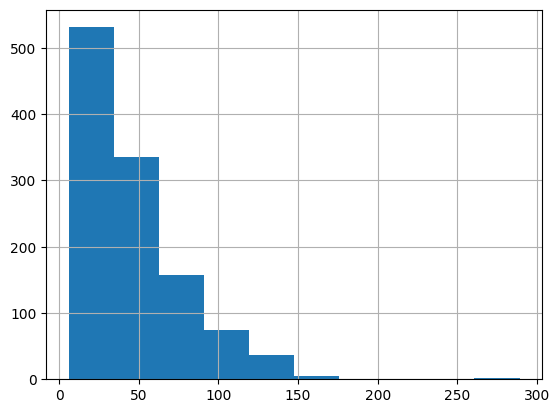

density


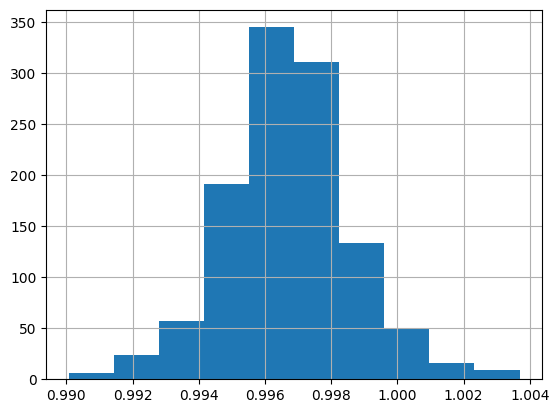

pH


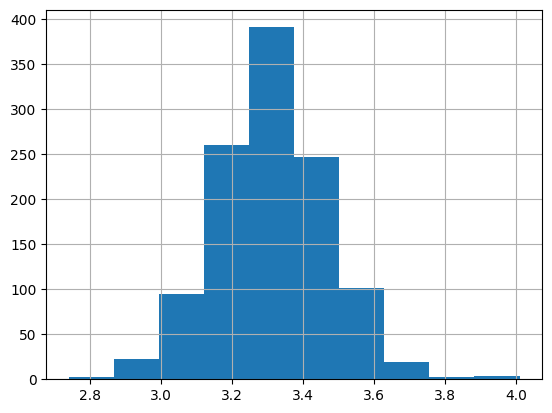

sulphates


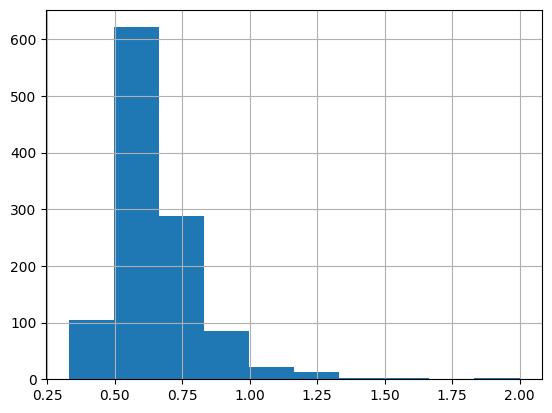

alcohol


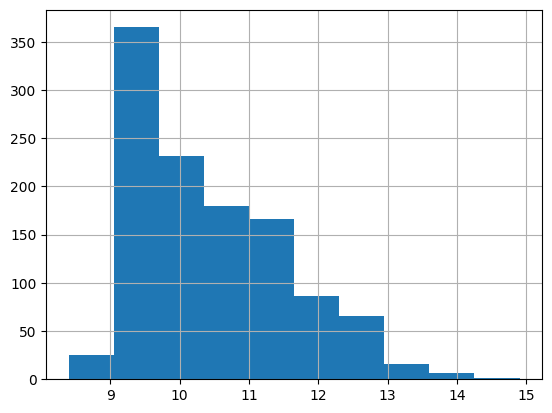

quality


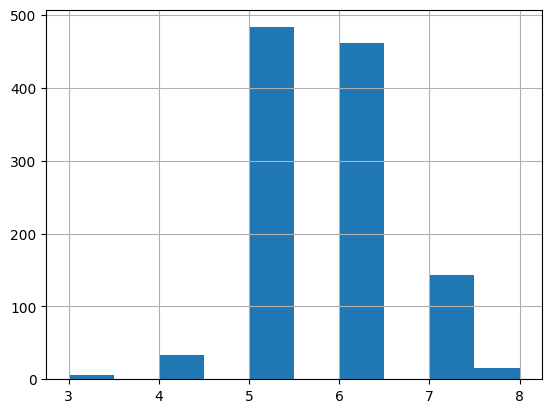

In [51]:
for columns in df:
    df[columns].hist()
    print(columns)
    plt.show()

In [52]:
x = df.drop(columns=['quality'])
y = df['quality']

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [54]:
clf = tree.DecisionTreeClassifier(random_state=42)
clf = clf.fit(x_train, y_train)

In [55]:
clf.score(x_test,y_test)

0.5860058309037901

In [56]:
print(f'Djupet på trädet är: {clf.get_depth()}')

print(f'Antalet löv: {clf.get_n_leaves()}')

Djupet på trädet är: 14
Antalet löv: 214


In [57]:
importance = clf.feature_importances_

feature_importance = dict(zip(x.columns, importance))

sorted_feature_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

print("Attributvikt:")
for feature, importance in sorted_feature_importance:
    print(feature, ":", importance)

Attributvikt:
sulphates : 0.15349052377864222
alcohol : 0.1486282663876216
volatile acidity : 0.1190812981991359
total sulfur dioxide : 0.11068951075584237
pH : 0.09478964461326206
citric acid : 0.08843110139401437
chlorides : 0.06862370755086229
density : 0.06091088142744968
residual sugar : 0.058009981629616854
fixed acidity : 0.04897225687482843
free sulfur dioxide : 0.048372827388724206


# VG

In [58]:
print(f"Vi får träningsscore: {clf.score(x_train,y_train)}")
print(f"Vi får testscore: {clf.score(x_test,y_test)}")

Vi får träningsscore: 1.0
Vi får testscore: 0.5860058309037901


### Som vi ser ovan så får vi en perfekt träningsscore vilket måste betyda att trädet katigoriserar in allting perfekt i förhållande till träningsdatan.
### Dock så även fast ca 60% är helt okej testscore så känns det inte allt för pålitligt. Detta kan bero på överträning och har gjort beslutsträdet för komplicerat och anpassar sig till träningsdatan och gör att den inte kan lika enkelt sortera ny data.
### Vi kan pröva att experimentera med parameterna för algoritmen t.ex. max djup, men även mängden träningsdata vi skickar in. Det kan även vara så att vi kan droppa onödiga attribut som inte har så mycket påverkan.
### Ytterliggare en sak man kan tillägga är att man även kan testa en annan modell, jag har jobbat med DecisionTreeClassifier, men nedan kommer jag testa RandomForestClassifier och se vad jag får för score med den.

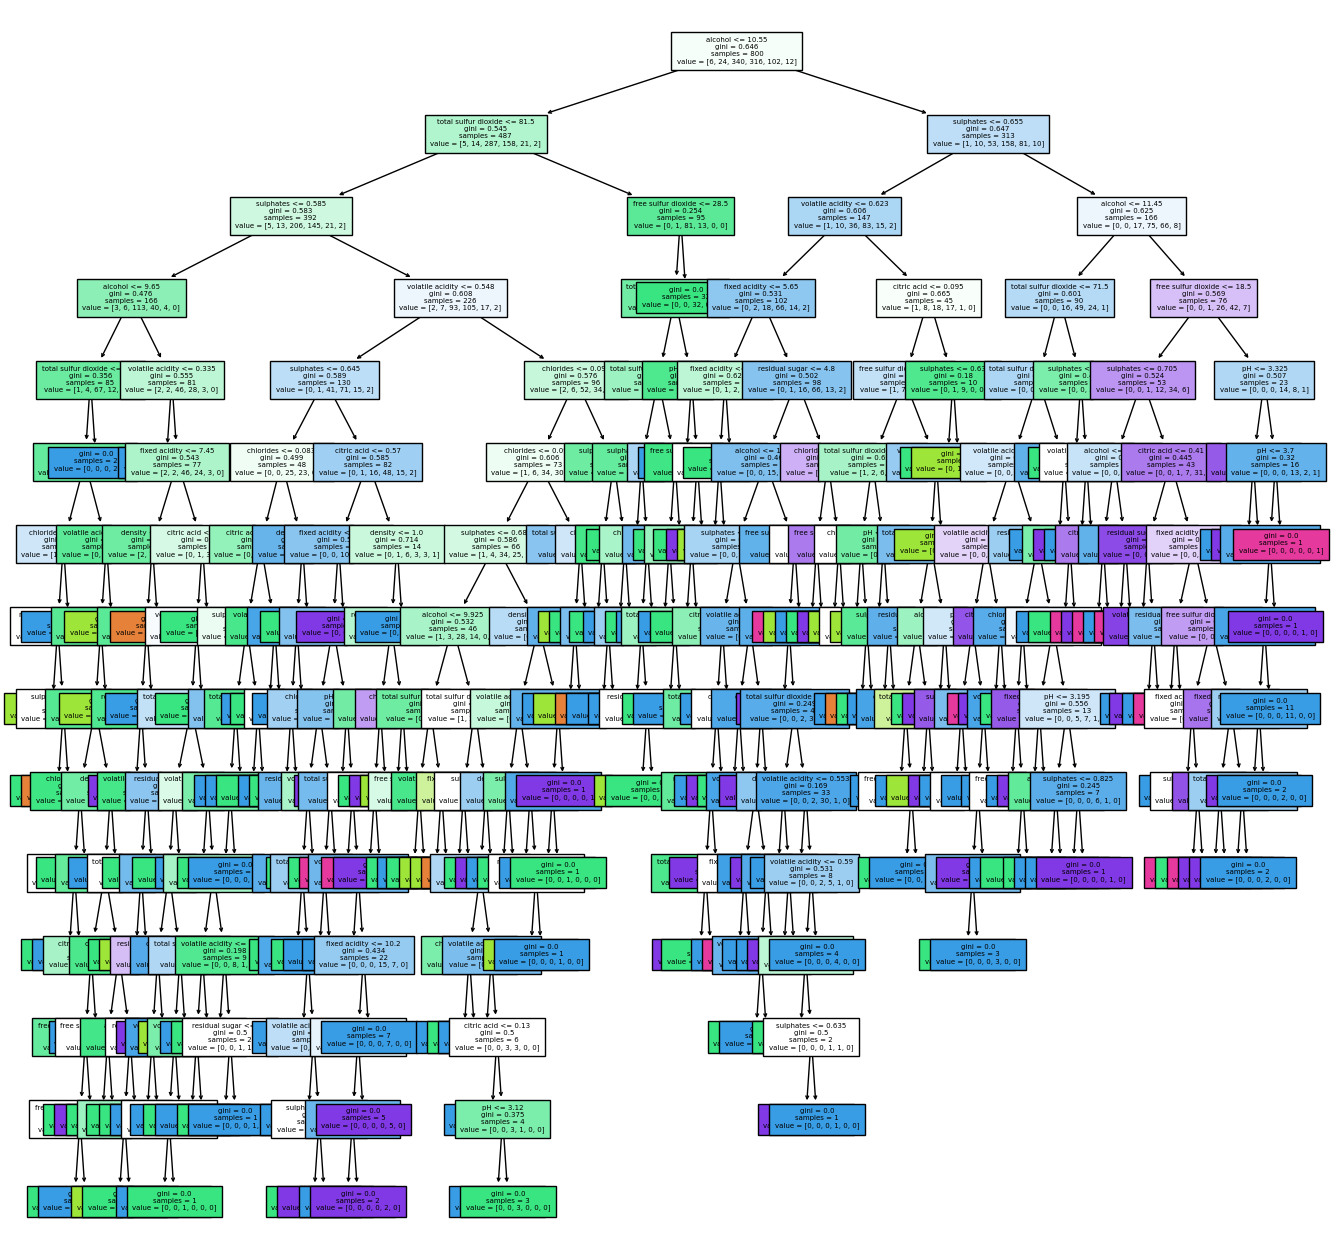

In [59]:
plt.figure(figsize=(16,16))
tree.plot_tree(clf,feature_names=clf.feature_names_in_ ,fontsize=5, filled=True)
plt.show()

In [60]:
my_child = []
for i in range(clf.tree_.node_count):
    n_children = 0
    if clf.tree_.children_left[i] != -1:
        n_children += 1
    if clf.tree_.children_right[i] != -1:
        n_children += 1
    my_child.append(n_children)
print(max(my_child))

2


### När jag ritar ut trädet så ser jag att från samtliga noder så kommer det två stycken grenar. Även när jag gör en for loop för att gå igenom alla noder så ser jag att det är maximalt två grenar. Detta verkar vara vanligt bland beslutsträd att man fattar ett binärt beslut att det är antingen eller och sedan så går det vidare till nästa binära beslut. Men det finns även gånger då den kan dela upp beslutet till numeriska värden, men den kommer ju alltid att göra det som den får ut bäst resultat utav och i detta fall så är det binärt. Även efter att ha letat runt så hittade jag att det kan bero på att den modellen jag använder "DecisionTreeClassifier" enbart tar binära beslut och då skulle även det förklara saker och ting, men när jag testar RandomForestClassifier som jag vet ska kunna dela upp det i flera grenar så blir det även där enbart två, men den är ju till för att skapa flera beslutsträd till en ensamble men att den väljer att splitta upp det till endast två möjliga resultat måste bero på att den får fram bästa möjliga resultat.

## Nedan så kommer jag testa att få ett bättre score genom att ändra på värdena för modellen samt att testa en annan modell

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=21, random_state=9)

In [62]:
clf = tree.DecisionTreeClassifier(random_state=1, max_depth=6)
clf = clf.fit(x_train, y_train)

In [63]:
print(f"Vi får träningsscore: {clf.score(x_train,y_train)}")
print(f"Vi får testscore: {clf.score(x_test,y_test)}")

Vi får träningsscore: 0.7094474153297683
Vi får testscore: 0.8095238095238095


### Kör nedanstående kod och ändra rangen på egen risk

In [64]:
# best = 0
# train_size = 0
# train_random = 0
# tree_random = 0
# tree_depth = 0
# for x1 in range(20,30):
#     for y1 in range(1,60):
#         x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=21, random_state=30)
#         for x2 in range(1,60):
#             for y2 in range(1,20):
#                 clf = tree.DecisionTreeClassifier(random_state=x2, max_depth=y2)
#                 clf = clf.fit(x_train, y_train)
#                 if clf.score(x_test,y_test) > best:
#                     best = clf.score(x_test,y_test)
#                     train_size = x1
#                     train_random = y1
#                     tree_random = x2
#                     tree_depth = y2

# print(best)
# print(train_size)
# print(train_random)
# print(tree_random)
# print(tree_depth)

In [65]:
model = RandomForestClassifier(random_state=42, max_depth=8)
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=8, random_state=42)

In [66]:
print(f"Vi får träningsscore: {model.score(x_train,y_train)}")
print(f"Vi får testscore: {model.score(x_test,y_test)}")

Vi får träningsscore: 0.8761140819964349
Vi får testscore: 0.8571428571428571
